In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import ipywidgets as widgets
from IPython.display import display
from sklearn.neighbors import NearestNeighbors
import time
import CQNet

In [2]:
# 卷积神经网络模型
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()

        # 编码器部分
        self.encoder1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )

        self.encoder2 = nn.Sequential(
            nn.Conv2d(
                1, 16, kernel_size=5, stride=1, padding=2
            ),  # 使用不同的卷积核大小
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )

        self.encoder3 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=7, stride=1, padding=3),  # 再增加一个并行层
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )

        self.encoder4 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=9, stride=1, padding=4),  # 继续增加
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )

        self.encoder5 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=11, stride=1, padding=5),  # 再增加一个
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )

        self.encoder6 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=13, stride=1, padding=6),  # 最后一个并行层
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )

        self.encoder3_combined = nn.Sequential(
            nn.Conv2d(
                16 * 6, 32, kernel_size=3, stride=1, padding=1
            ),  # 更新为输入通道数为并行输出的总和
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )

        # 解码器部分
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=2, stride=2),
            nn.Sigmoid(),
        )

    def forward(self, x):
        # 并行编码
        encoded1 = self.encoder1(x)
        encoded2 = self.encoder2(x)
        encoded3 = self.encoder3(x)
        encoded4 = self.encoder4(x)
        encoded5 = self.encoder5(x)
        encoded6 = self.encoder6(x)

        # 将所有编码器的输出拼接在一起
        encoded = torch.cat(
            (encoded1, encoded2, encoded3, encoded4, encoded5, encoded6), dim=1
        )  # 在通道维度拼接

        # 继续编码
        encoded = self.encoder3_combined(encoded)

        # 解码过程
        decoded = self.decoder(encoded)
        return decoded

In [17]:
# 一层并行
import torch
import torch.nn as nn


# 卷积神经网络模型
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # 编码器部分
        self.encoder1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 128, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )

        self.encoder2 = nn.Sequential(
            nn.Conv2d(
                1, 32, kernel_size=15, stride=1, padding=7
            ),  # 使用不同的卷积核大小
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(
                32, 64, kernel_size=3, stride=1, padding=1
            ),  # 使用不同的卷积核大小
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )

        # self.encoder3 = nn.Sequential(
        #     nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(),
        #     nn.MaxPool2d(2, 2)
        # )

        # 解码器部分
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(192, 64, kernel_size=2, stride=2),
            nn.ReLU(),
            # nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),
            # nn.ReLU(),
            nn.ConvTranspose2d(64, 1, kernel_size=2, stride=2),
            nn.Sigmoid(),
        )

    def forward(self, x):
        # 并行编码
        encoded1 = self.encoder1(x)
        encoded2 = self.encoder2(x)

        # 将两个编码器的输出拼接在一起
        encoded = torch.cat((encoded1, encoded2), dim=1)  # 在通道维度拼接

        # 继续编码
        # encoded = self.encoder3(encoded)

        # 解码过程
        decoded = self.decoder(encoded)
        return decoded

In [6]:
# 一层并行 & dropout
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # 编码器部分
        self.encoder1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            # nn.Dropout(0.25)  # 加入Dropout层，丢弃率为25%
        )

        self.encoder2 = nn.Sequential(
            nn.Conv2d(
                1, 16, kernel_size=15, stride=1, padding=7
            ),  # 使用不同的卷积核大小
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            # nn.Dropout(0.25)  # 加入Dropout层，丢弃率为25%
        )

        self.encoder3 = nn.Sequential(
            nn.Conv2d(
                1, 16, kernel_size=3, stride=1, padding=1
            ),  # 使用不同的卷积核大小
            nn.ReLU(),
            nn.MaxPool2d(4, 4),
        )

        self.encoder4 = nn.Sequential(
            nn.Conv2d(80, 80, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            # nn.Dropout(0.25)  # 加入Dropout层
        )

        # 解码器部分
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(80, 32, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=2, stride=2),
            nn.Sigmoid(),
        )

    def forward(self, x):
        # 并行编码
        encoded1 = self.encoder1(x)
        encoded2 = self.encoder2(x)
        encoded3 = self.encoder3(x)

        # 将两个编码器的输出拼接在一起
        encoded = torch.cat((encoded1, encoded2, encoded3), dim=1)  # 在通道维度拼接

        # 继续编码
        encoded = self.encoder4(encoded)

        # 解码过程
        decoded = self.decoder(encoded)
        return decoded

In [2]:
# 深度卷积神经网络模型
class DeepConvNet(nn.Module):
    def __init__(self):
        super(DeepConvNet, self).__init__()
        # 编码器部分
        self.encoder1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2),
        )

        self.encoder2 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=7, stride=1, padding=3),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2),
        )

        # 新增一个更深的编码器分支
        self.encoder3 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=15, stride=1, padding=7),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2),
        )
                # 新增一个更深的编码器分支
        self.encoder4 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=25, stride=1, padding=12),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=7, stride=1, padding=3),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2),
        )

        # 解码器部分
        # 解码器部分，调整卷积转置层的参数来减少输出尺寸
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(384, 128, kernel_size=2, stride=2),  # 将通道从 384 减少到 128
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.ConvTranspose2d(128, 1, kernel_size=2, stride=2),  # 减少通道数，增加空间分辨率
            # nn.ReLU(),
            # nn.BatchNorm2d(64),
            # nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1),  # 减少输出到目标大小
            nn.Sigmoid(),
        )


    def forward(self, x):
        # 并行编码
        encoded1 = self.encoder1(x)
        encoded2 = self.encoder2(x)
        encoded3 = self.encoder3(x)
        encoded4 = self.encoder4(x)

        # 将三个编码器的输出拼接在一起
        encoded = torch.cat((encoded1, encoded2, encoded3, encoded4), dim=1)  # 在通道维度拼接

        # 解码过程
        decoded = self.decoder(encoded)
        return decoded

In [7]:
# origin model
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # 编码器部分
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )

        # 解码器部分
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=2, stride=2),
            nn.Sigmoid(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

torch.Size([500, 1, 600, 512])


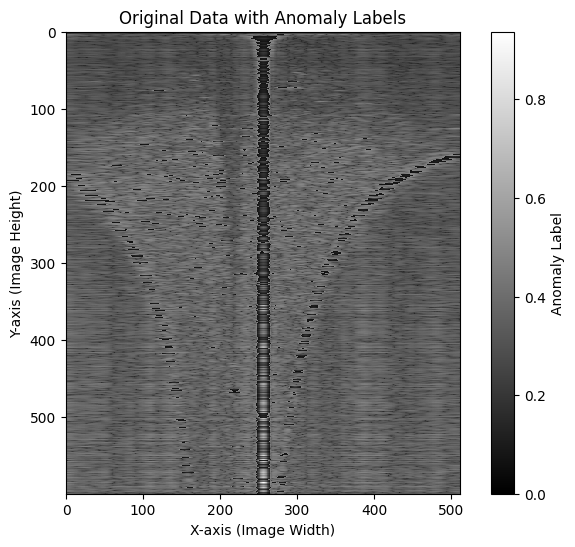

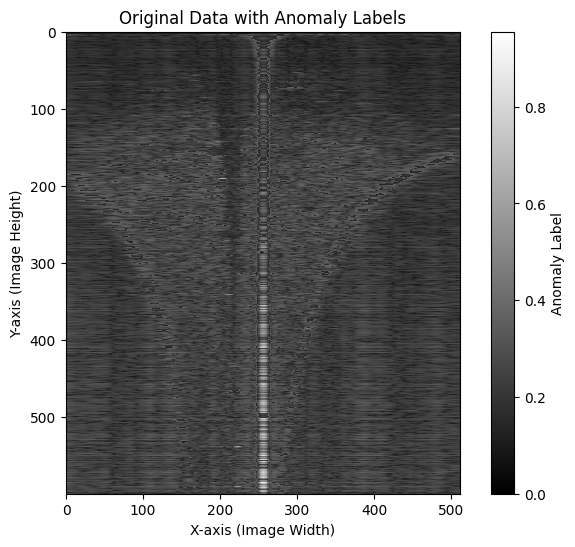

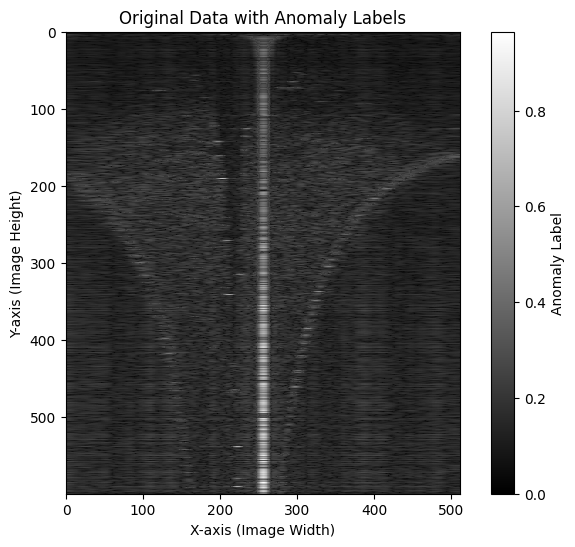

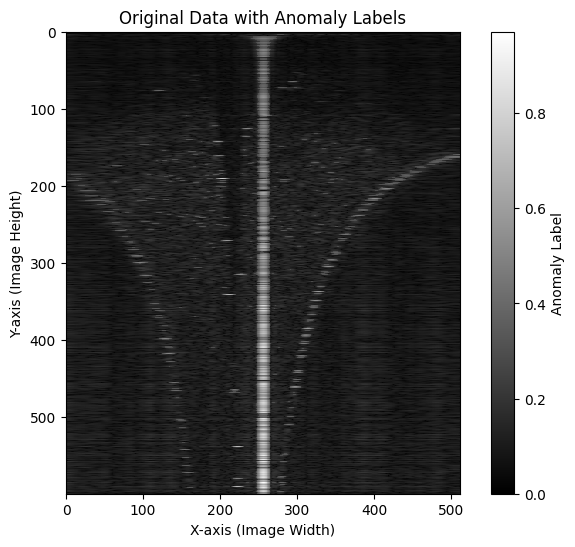

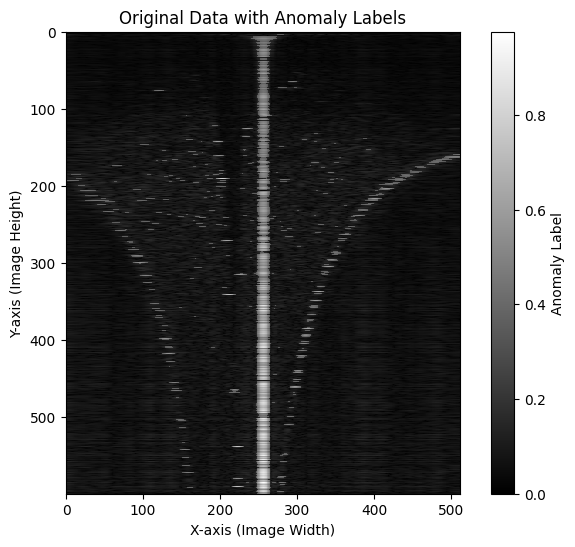

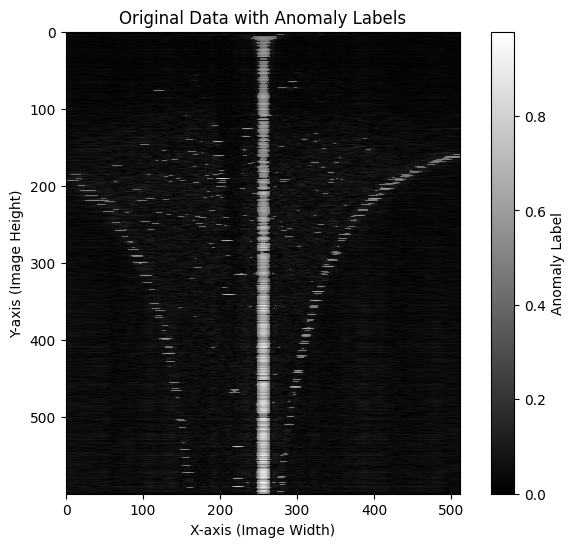

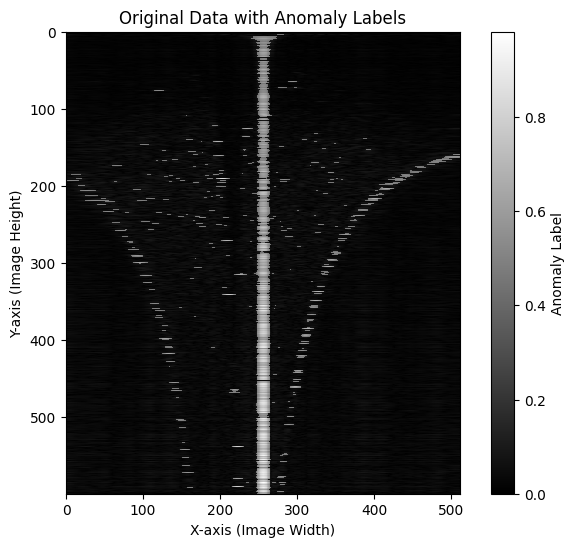

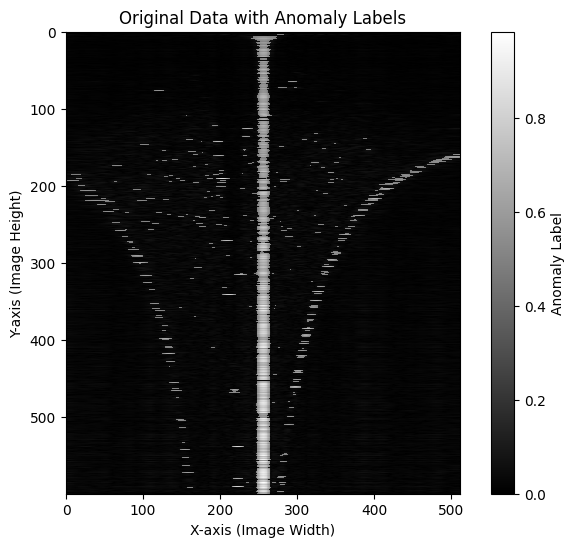

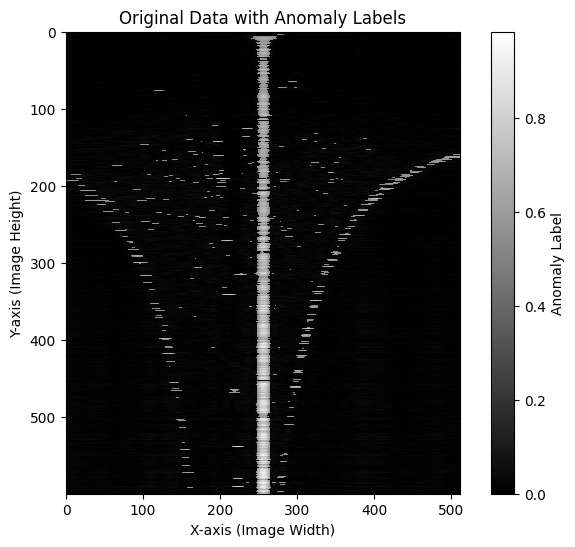

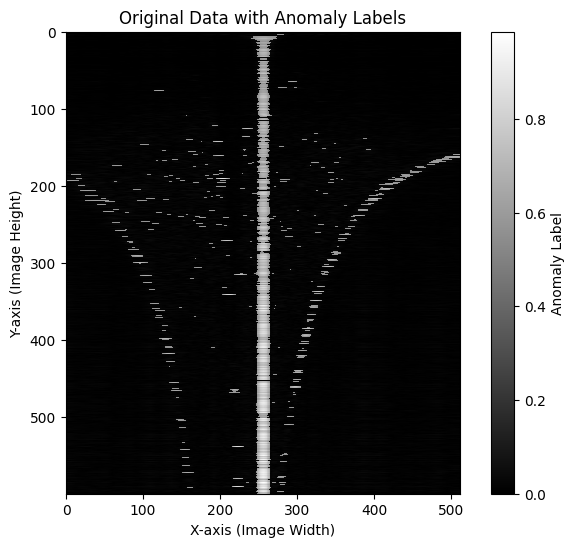

In [2]:
train_num = 50
# Read and reshape image data

file_path = "./data/go22-26m.dat"

img_8bit_matrix = CQNet.read_sonar_data(file_path, train_num)

ans = CQNet.reshape_img_matrix(img_8bit_matrix, train_num)  # ans为最后读出来的三维数组

ans_tensor, labels_tensor = CQNet.prepare_data_and_labels(
    ans, train_num, show_labels=False, weather_plot=True
)
# new_ans_tensor, new_labels_tensor = prepare_data_and_labels(ans)

In [4]:
# 初始化卷积网络
conv_net = DeepConvNet()
# 检查 GPU 是否可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 加载预训练模型的权重
conv_net.load_state_dict(torch.load("./model/SuperDeep.pth", map_location=device))
# 将模型移动到 GPU
conv_net.to(device)
# 将数据和标签移动到 GPU
ans_tensor = ans_tensor.to(device)
labels_tensor = labels_tensor.to(device)

In [5]:
# for i in range(20):
# 开始训练卷积神经网络
CQNet.train_supervised_model(conv_net, ans_tensor, train_num = 6, labels= labels_tensor, batch_size=8, learning_rate=0.005)
# 保存模型参数

Training supervised model...
Batch 1/32, Loss: 0.0016
Batch 2/32, Loss: 0.0766
Batch 3/32, Loss: 0.0062
Batch 4/32, Loss: 0.0146
Batch 5/32, Loss: 0.0180
Batch 6/32, Loss: 0.0121
Batch 7/32, Loss: 0.0115
Batch 8/32, Loss: 0.0118
Batch 9/32, Loss: 0.0098
Batch 10/32, Loss: 0.0111
Batch 11/32, Loss: 0.0049
Batch 12/32, Loss: 0.0060
Batch 13/32, Loss: 0.0063
Batch 14/32, Loss: 0.0076
Batch 15/32, Loss: 0.0059
Batch 16/32, Loss: 0.0046
Batch 17/32, Loss: 0.0045
Batch 18/32, Loss: 0.0034
Batch 19/32, Loss: 0.0042
Batch 20/32, Loss: 0.0036
Batch 21/32, Loss: 0.0045
Batch 22/32, Loss: 0.0042
Batch 23/32, Loss: 0.0030
Batch 24/32, Loss: 0.0043
Batch 25/32, Loss: 0.0028
Batch 26/32, Loss: 0.0036
Batch 27/32, Loss: 0.0025
Batch 28/32, Loss: 0.0030
Batch 29/32, Loss: 0.0027
Batch 30/32, Loss: 0.0024
Batch 31/32, Loss: 0.0028
Batch 32/32, Loss: 0.0026
Epoch [1/6] finished, Total Loss: 0.2627, Time: 378.74 seconds
Layer: encoder1.0.weight, Grad Norm: 0.0005
Layer: encoder1.0.bias, Grad Norm: 0.0003

In [6]:
# 保存模型参数
torch.save(conv_net.state_dict(), "./model/SuperDeep.pth")

In [ ]:
# 使用训练后的模型进行预测
conv_net.eval()
with torch.no_grad():
    predictions = conv_net(ans_tensor)

# 交互式显示切片和预测结果
CQNet.interactive_plot(ans_tensor[0:1], predictions[0:1])

In [ ]:
ans_tensor[0:10].shape

In [ ]:
import torch
from torchviz import make_dot

# 创建模型实例
conv_net = ConvNet()

# 生成一个随机输入数据
x = torch.randn(1, 1, 1200, 1024)  # 根据您的输入尺寸进行调整

# 前向传播
y = conv_net(x)

# 可视化计算图
dot = make_dot(y, params=dict(conv_net.named_parameters()))
dot.render("conv_net_architecture", format="png")  # 生成 PNG 文件